# HandWritten Digit Recognition

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train, y_train),(X_test , y_test)=keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

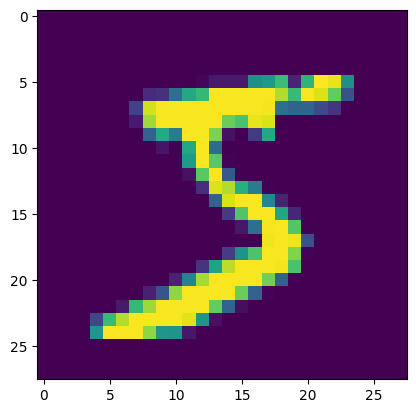

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

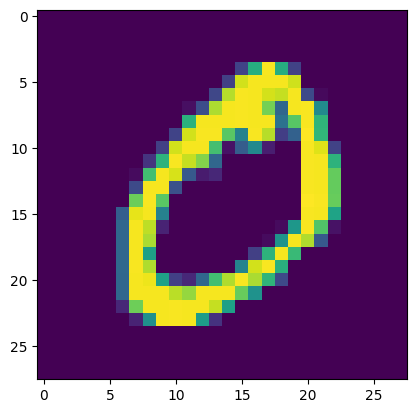

In [9]:
plt.imshow(X_train[1])

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Scaling in range [0,1]
- Values vary in range of 0-255
- Divide each value by 255

In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Building ANN

In [33]:
model=Sequential()

#Falltening 2D array of image to 1D array
model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='Softmax'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.compile(loss='sparse_categorical_crossentropy' , optimizer='Adam' , metrics=['accuracy'])

In [38]:
history=model.fit(X_train,y_train,epochs=25,validation_split=.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2905 - accuracy: 0.9173 - val_loss: 0.1539 - val_accuracy: 0.9554
Epoch 2/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1244 - accuracy: 0.9625 - val_loss: 0.1264 - val_accuracy: 0.9604
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0852 - accuracy: 0.9731 - val_loss: 0.1091 - val_accuracy: 0.9667
Epoch 4/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0660 - accuracy: 0.9793 - val_loss: 0.0962 - val_accuracy: 0.9732
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0502 - accuracy: 0.9843 - val_loss: 0.0866 - val_accuracy: 0.9744
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0413 - accuracy: 0.9866 - val_loss: 0.0870 - val_accuracy: 0.9747
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0327 - accuracy: 0.9893 - val_loss: 0.0883 - val_accuracy:

In [39]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [40]:
y_prob

array([[9.49566540e-15, 3.05935053e-14, 2.96655235e-11, ...,
        1.00000000e+00, 8.66679982e-16, 3.46605106e-10],
       [2.32854739e-24, 2.55184545e-12, 1.00000000e+00, ...,
        4.46636282e-30, 8.08018053e-27, 1.39937192e-26],
       [1.89932586e-14, 1.00000000e+00, 2.45790854e-08, ...,
        3.84367738e-08, 4.15289803e-09, 8.34324573e-15],
       ...,
       [8.49963747e-35, 3.15518727e-30, 4.19823905e-31, ...,
        3.27758552e-15, 2.46929185e-21, 1.01135980e-14],
       [1.08501416e-29, 5.87413730e-19, 6.83323001e-25, ...,
        3.35022640e-27, 1.37852537e-15, 1.04103781e-23],
       [2.60829561e-25, 6.64579972e-24, 1.07173814e-24, ...,
        9.34236646e-27, 1.90695562e-22, 5.41892653e-26]], dtype=float32)

In [41]:
y_pred=y_prob.argmax(axis=1)

In [42]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9771

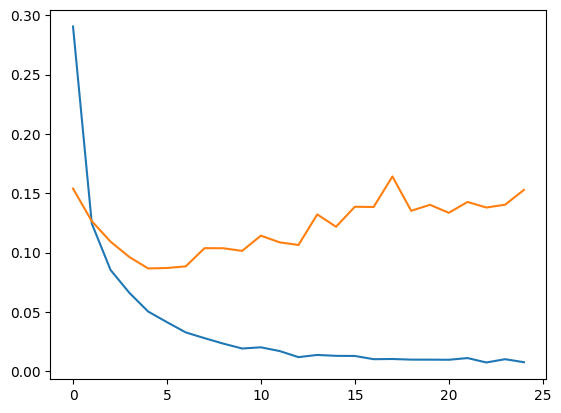

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#### Above graph is showing overfitting bcz after a certain point validation lass start increaing

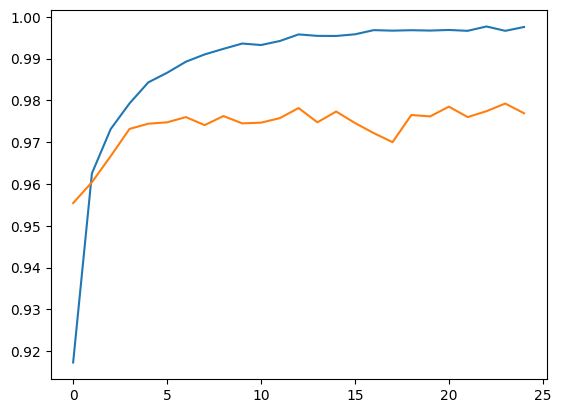

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## Testing our model

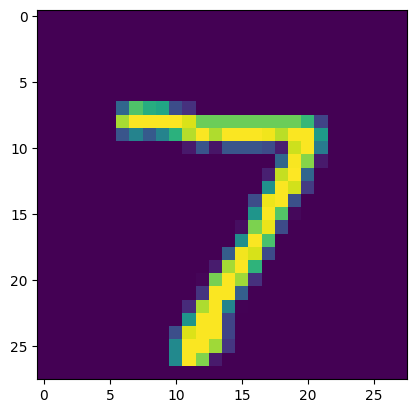

In [48]:
plt.imshow(X_test[0])

In [53]:
output=model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)
print("Prediction for above image is ",output)

1/1 [==============================] - 0s 23ms/step
Prediction for above image is  [7]


1/1 [==============================] - 0s 32ms/step
Prediction for image is  [1]


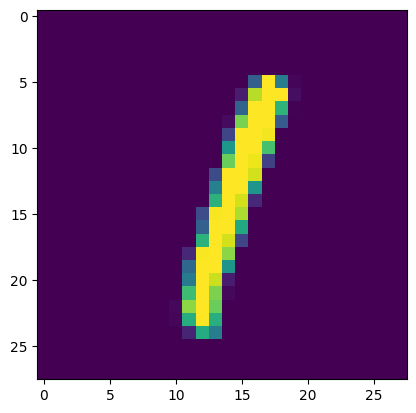

In [57]:
plt.imshow(X_test[5])
output=model.predict(X_test[5].reshape(1,28,28)).argmax(axis=1)
print("Prediction for image is ",output)